In [ ]:
!apt-get install -y python-qt4, blockcypher

In [ ]:
!pip install bs4

In [1]:
import datalab.bigquery as bq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import num2date
from matplotlib.dates import date2num
from matplotlib.finance import candlestick_ohlc
import json
from pprint import pprint
from PyQt4 import QtGui, QtCore
import urllib
import requests
import sys
import gzip
import urllib
import datetime
import numpy as np
import pandas as pd
import time
import re

In [2]:
%%sql --module txn
select count(txid) as no_of_txn, txnTS from blockchain.userEdges
group by txnTS


In [ ]:
df = bq.Query(txn).to_dataframe()

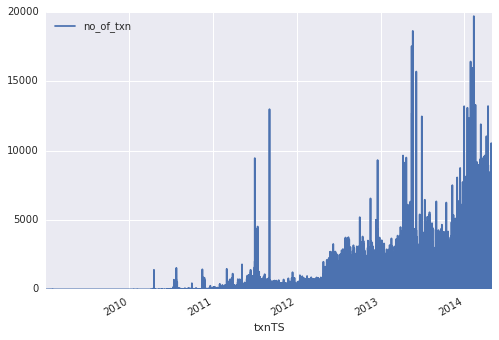

In [4]:
df.plot(x='txnTS',y='no_of_txn')

In [38]:
%%sql --module btc_sinks
SELECT a.outAddrId, b.address, sum(a.value) as btc_amount
FROM (
SELECT 
  outAddrId, value
FROM [plasma-centaur-859:blockchain.userEdges]
) a
JOIN EACH (
SELECT
  id, address
FROM
  [plasma-centaur-859:blockchain.address] 
) b
ON a.outAddrId = b.id
WHERE a.outAddrId = b.id
GROUP BY 1,2
ORDER BY 3 DESC
LIMIT 500


In [6]:
topSinks=bq.Query(btc_sinks).to_dataframe()

In [7]:
topSinks

,outAddrId,address,btc_amount
0,2536935,13hKjDXD5WFZreZzfAGFpgajEdMotuxRvk,2.546664e+07
1,2298461,17URSNmoNqAunWUa3fi6rx22s8BJkAEkPT,5.706508e+06
2,7996957,19Hx7xow6RKTcqney12KYFsZzKpRib8iG1,5.005462e+06
3,17322005,17zRM14vC2z4QtSnANdnthY9LYovnfV84Z,3.403557e+06
4,12557222,18T1hzjughXdG4ucUh8ACDmCYK3baJpCEf,1.771494e+06
5,11204757,17wWMcge7fWV9r6JCLRc4iVmPnW6yGhNUc,1.573960e+06
6,19314133,1NQvPqe2op85q9X9hgSY5GxJERmqoSBmCf,1.569076e+06
7,3524361,1LWBSqy4s7yZrKU6GfFzx7YmsHcXfuksUZ,1.016878e+06
8,6835733,16YgsR6EGWtx3N2X3c6DvTesrKab9qriu6,9.550461e+05
9,7033638,14486XytdA6yKh4cGUGzrmxccaSznXeAAD,9.228888e+05


In [8]:
import json
from blockcypher import get_address_overview
import time

In [9]:

def getAddressInfo(smallDf, token):
  for index, row in smallDf.iterrows():
    data = (get_address_overview(row['address'],'btc',token))
    final_n_tx = data['final_n_tx']
    n_tx = data['n_tx']
    unconfirmed_balance = data['unconfirmed_balance']
    final_balance = data['final_balance']
    balance = data['balance']
    total_sent = data['total_sent']
    address = data['address']
    total_received = data['total_received']
    print(address, total_received, balance, final_n_tx, total_sent)
    temp = {
      "address": address,
      "final_n_tx": final_n_tx,
      "n_tx": n_tx,
      "unconfirmed_balance": unconfirmed_balance,
      "final_balance": final_balance,
      "balance": balance,
      "total_sent": total_sent,
      "total_received": total_received,
    }
    addresses.append(temp)
    #introduce pause
    time.sleep (100.0 / 1000.0); 
    

In [10]:
addresses=[]
df_new1, df_new2, df_new3 = topSinks[:199], topSinks[200:399], topSinks[400:499]

In [11]:
#bypassing API call rate limit
getAddressInfo(df_new1,'62aa1f7dbc694b3e939fa8a2b9762f9f')

(u'13hKjDXD5WFZreZzfAGFpgajEdMotuxRvk', 23231010, 0, 2, 23231010)
(u'17URSNmoNqAunWUa3fi6rx22s8BJkAEkPT', 1147262900, 0, 2, 1147262900)
(u'19Hx7xow6RKTcqney12KYFsZzKpRib8iG1', 35552011, 0, 2, 35552011)
(u'17zRM14vC2z4QtSnANdnthY9LYovnfV84Z', 199999950000, 0, 2, 199999950000)
(u'18T1hzjughXdG4ucUh8ACDmCYK3baJpCEf', 98000004, 0, 2, 98000004)
(u'17wWMcge7fWV9r6JCLRc4iVmPnW6yGhNUc', 1064361310, 0, 2, 1064361310)
(u'1NQvPqe2op85q9X9hgSY5GxJERmqoSBmCf', 81000000, 0, 3, 81000000)
(u'1LWBSqy4s7yZrKU6GfFzx7YmsHcXfuksUZ', 214460712207, 0, 2, 214460712207)
(u'16YgsR6EGWtx3N2X3c6DvTesrKab9qriu6', 1390000, 0, 2, 1390000)
(u'14486XytdA6yKh4cGUGzrmxccaSznXeAAD', 3922905117, 0, 2, 3922905117)
(u'13SH2dehm6oxFav9dMc7i1NpMsgTVDWbpj', 1800000, 0, 2, 1800000)
(u'1idWZBys5AVK8PBZL2JHwFVe7vnFCe4Qk', 1195000, 0, 2, 1195000)
(u'17R1QnCThtmjkFTm7Xbrq14TyhA2thHLSP', 283524240, 0, 2, 283524240)
(u'1CBhbofpCiHeYekqqvtsD4gN7VRXyy1kV5', 50000000, 0, 2, 50000000)
(u'18om4X8rebEEGYtigU458Z9v8cFajdXshh', 78605090, 0, 

In [ ]:
#Get know identities

In [12]:
from bs4 import BeautifulSoup

known_addresses = []

def lets_get_scraping(url, id):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')

    for tr in soup.tbody.find_all('tr'):
        for strong_tag in tr.find_all('strong'):
            if id == 1:
                temp = {strong_tag.get_text(): 1}
                known_addresses.append(temp)
            elif id == 2:
                temp = {strong_tag.get_text(): 2}
                known_addresses.append(temp)
            elif id == 3:
                temp = {strong_tag.get_text(): 3}
                known_addresses.append(temp)
            elif id == 4:
                temp = {strong_tag.get_text(): 4}
                known_addresses.append(temp)
    return known_addresses


for i in range(17):
    gambling = 'http://bitcoinwhoswho.com/search/index/index/keyword/gambling/page/{0}'.format(i)
    lets_get_scraping(gambling, id=1)

print('Completed: Gambling')

for i in range(2):
    charity = 'http://bitcoinwhoswho.com/search/index/index/keyword/charity/page/{0}'.format(i)
    lets_get_scraping(charity, id=2)

for i in range(34):
    charity = 'http://bitcoinwhoswho.com/search/index/index/keyword/donate/page/{0}'.format(i)
    lets_get_scraping(charity, id=2)

print('Completed: Charity')

for i in range(17):
    finance = 'http://bitcoinwhoswho.com/search/index/index/keyword/finance/page/{0}'.format(i)
    lets_get_scraping(finance, id=3)

print('Completed: Finance')

for i in range(162):
    exchange = 'http://bitcoinwhoswho.com/search/index/index/keyword/exchange/page/{0}'.format(i)
    lets_get_scraping(exchange, id=3)

Completed: Gambling
Completed: Charity
Completed: Finance


In [64]:
%%sql --module address_with_most_senders
SELECT b.address as addr, count (DISTINCT sender) as sender_counts
FROM
(SELECT 
  sender, outAddrId
FROM [plasma-centaur-859:blockchain.userEdges]
) a
JOIN EACH (
SELECT
  id, address
FROM
  [plasma-centaur-859:blockchain.address] 
) b
ON a.outAddrId = b.id
WHERE a.outAddrId = b.id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 20000

In [65]:
most_senderDf=bq.Query(address_with_most_senders).to_dataframe()

In [68]:
Gambling = []
Charity = []
Finance = []
for index, row in most_senderDf.iterrows():
  for known in known_addresses:
       k = known.keys()[0]
       if k == row['addr']:
          if known[k] == 1:
              Gambling.append(row['addr'])
          if known[k] == 2:
              Charity.append(row['addr'])
          if known[k] == 3:
              Finance.append(row['addr'])

In [70]:
print 'number of Gambling -> ' + str(len(Gambling)) 
print 'number of Charity -> ' + str(len(Charity)) 
print 'number of Finance -> ' + str(len(Finance)) 

number of Gambling -> 4
number of Charity -> 0
number of Finance -> 0


In [71]:
Gambling

['17mfXdqBGHEg9xacLDNnZSHNvkDS5BBDmn',
 '17mfXdqBGHEg9xacLDNnZSHNvkDS5BBDmn',
 '1Eb7PfCxrn5YZr2XVoYanMmkjrHBTXDcBT',
 '1Eb7PfCxrn5YZr2XVoYanMmkjrHBTXDcBT']

In [ ]:
#Time series analysis USD/BTC and USD/Gold

In [2]:
def remove_bitcoin_date_duplicates(frame):
    """
    Remove bitcoin date duplicates by using (weighted) aggregation.
    """
    # Aggregate duplicate dates
    frame['price'] = frame['price'] * frame['amount']
    frame = frame.groupby(level=0).sum()
    frame['price'] = np.round(frame['price'] / frame['amount'], 5)
    return frame

In [3]:
def convert_to_ohlc(frame, freq='1D'):
    """
    Compute bitcoin OHLC data frame with the given frequency.
    @param frame: raw bitcoin price history.
    @param freq: target OHLC frequency.
    """
    ohlc = frame['price'].resample(freq).ohlc()
    close = frame['price'].resample(freq).last().ffill()
    for column in ['open', 'high', 'low', 'close']:
        ohlc[column] = np.where(np.isnan(ohlc[column]), close, ohlc[column])
    ohlc['amount'] = frame['amount'].resample(freq).last()
    ohlc['amount'].fillna(0.0, inplace=True)
    return ohlc

In [15]:
#load csv from google cloud storage btc prices
%storage read --object gs://testdata-bg-ml/blockchain/mtgoxUSD.csv --variable btcusd

In [16]:
from StringIO import StringIO
btcdf=pd.read_csv(StringIO(btcusd), header=None)
btcdf.columns = ['dt', 'price', 'amount']
btcdf['dt'] = pd.to_datetime(btcdf['dt'], unit='s')

In [17]:
btcdf.set_index(btcdf['dt'], inplace=True)
btcdf.sort_index()
btcdf=btcdf[['price', 'amount']]

In [18]:
remove_bitcoin_date_duplicates(btcdf)
btc_ohlc=convert_to_ohlc(btcdf, freq='1D')
btc_ohlc[len(btc_ohlc)-20:len(btc_ohlc)-1]

,open,high,low,close,amount
dt,,,,,
2014-02-06,9.047000,165039.858852,0.000008,207.244967,0.250000
2014-02-07,41.350000,159797.250000,0.000007,6.956182,0.010000
2014-02-08,6.852200,132837.779797,0.000007,42.847200,0.066000
2014-02-09,3952.879440,97880.026541,0.000006,6.594978,0.010000
2014-02-10,43.333572,174000.000000,0.000005,7.525331,0.012922
2014-02-11,87.968410,88007.660000,0.000006,308.289536,0.532672
2014-02-12,102.511593,253297.287595,0.000005,21.240000,0.040000
2014-02-13,5.400370,126467.532664,0.000005,1804.680000,4.000000
2014-02-14,23.853474,171746.092896,0.000006,851.192311,1.991000


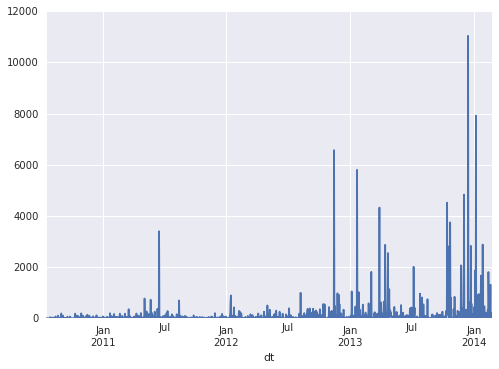

In [19]:
btc_ohlc['close'].plot()

In [58]:
%%sql --module goldusd
SELECT DATE(date) AS dt, price as close
FROM blockchain.gold2usdDaily
WHERE DATE(date) >= DATE('2010-07-17') AND DATE(date) <= DATE('2014-02-25') 
ORDER BY dt

In [59]:
golddf=bq.Query(goldusd).to_dataframe().set_index('dt')

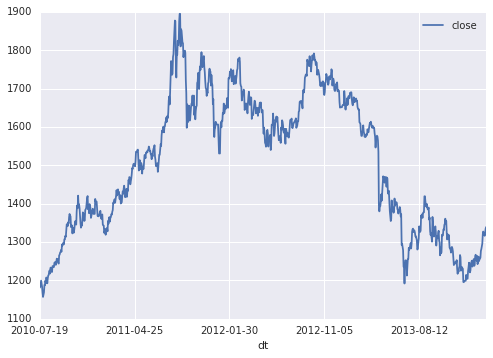

In [60]:
golddf.plot()

In [65]:
data = golddf.join(btc_ohlc['close'],how='left', lsuffix='_gold', rsuffix='_btc')
data['gold_scaled'] = data['close_gold']/max(data['close_gold'])
data['btc_scaled'] = data['close_btc']/max(data['close_btc'])

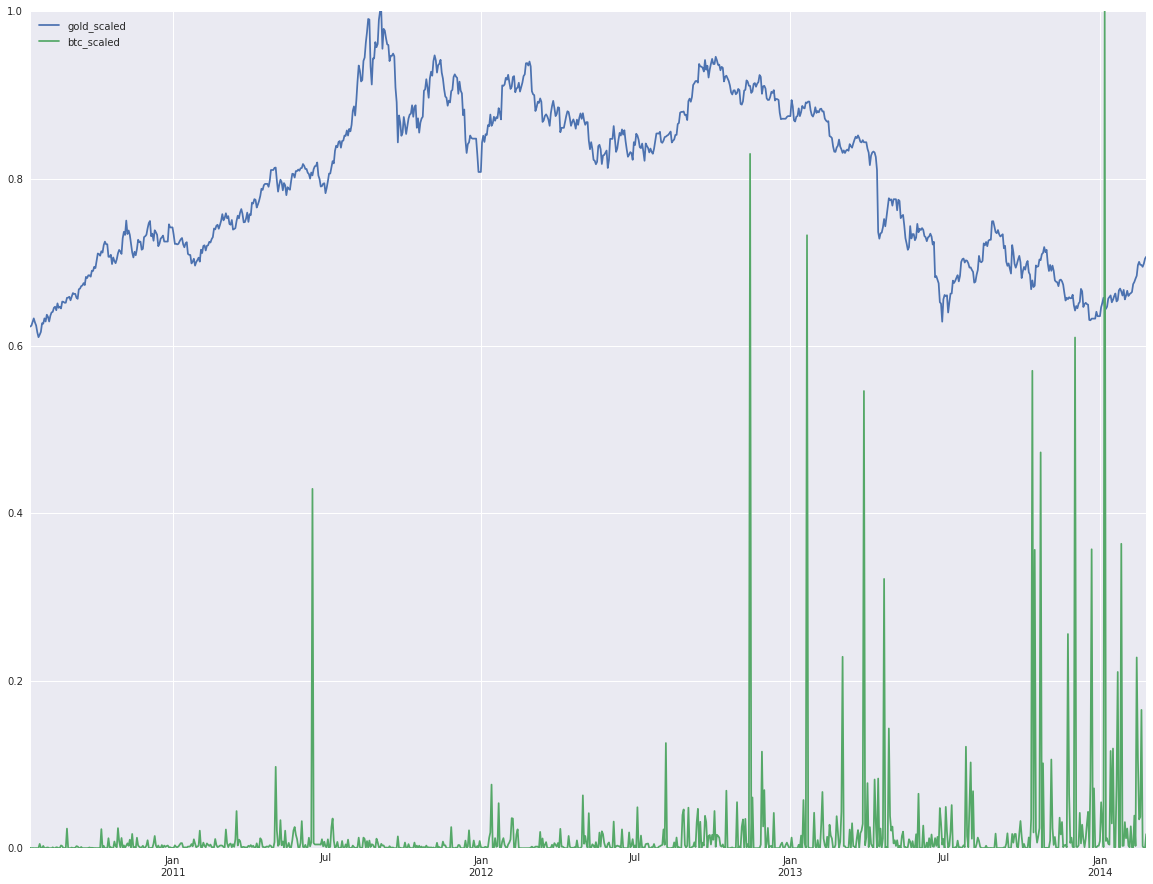

In [69]:
data_scaled=pd.concat([data['gold_scaled'],data['btc_scaled']],axis=1)
data_scaled.plot(figsize=(20,15))

In [80]:
log_return = pd.DataFrame()
log_return['gold_return'] = np.log(data['close_gold']/data['close_gold'].shift())
log_return['btc_return'] = np.log(data['close_btc']/data['close_btc'].shift())

In [79]:
log_return.describe()

,gold_return,btc_return
count,941.000000,941.000000
mean,0.000133,0.003735
std,0.011928,3.511937
min,-0.095962,-17.665482
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,0.048387,18.281800


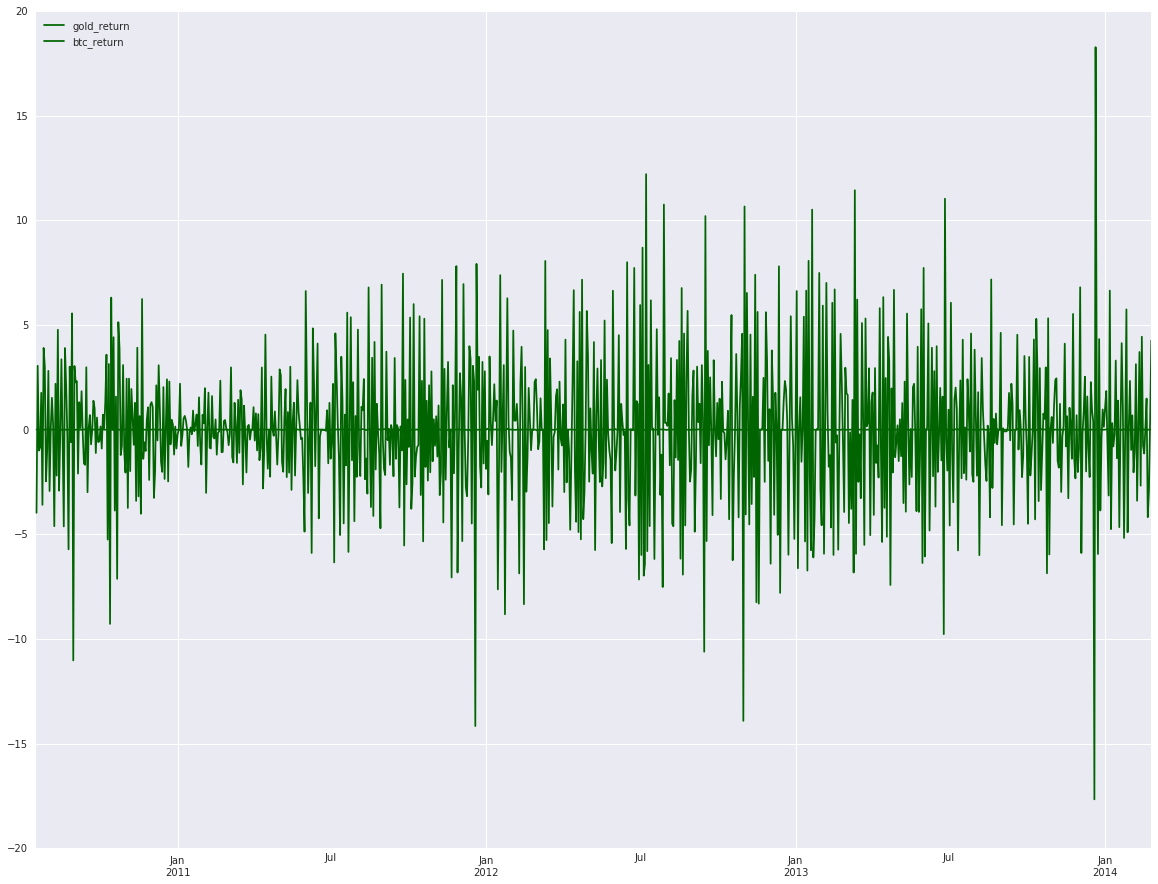

In [85]:
_ = pd.concat([log_return['gold_return'], log_return['btc_return']], axis=1).plot(figsize=(20,15), color='darkgreen')

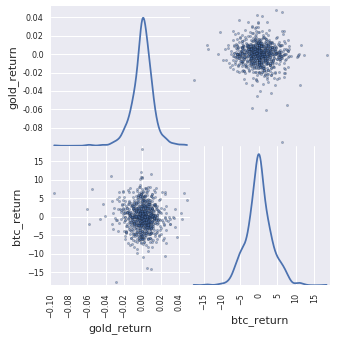

In [90]:
from pandas.tools.plotting import scatter_matrix
_ = scatter_matrix (log_return, figsize=(5,5), diagonal='kde')

In [92]:
log_return.corr(method='spearman',min_periods=1)

,gold_return,btc_return
gold_return,1.000000,-0.060505
btc_return,-0.060505,1.000000


In [137]:
def getTxnRelayIP(hash):
  api_url = "https://blockchain.info/rawtx/" + hash
  res = requests.get(api_url)
  resJson=json.loads(res.text)
  print resJson
  return resJson['relayed_by']


In [127]:
%%sql --module top_value_txns
SELECT txnKey
FROM [plasma-centaur-859:blockchain.top_100_value_txns]

In [128]:
txn_pd=bq.Query(top_value_txns).to_dataframe()

In [133]:
from geoip import geolite2
where = []
for index, row in txn_pd.iterrows():
  ip = getTxnRelayIP(row['txnKey'])
  match = geolite2.lookup(ip)
  if match != None:
    dict['lat'] = match.location[0]
    dict['lon'] = match.location[1]
    where.append(dict)


In [138]:
getTxnRelayIP('3b7c45eec9810eacb57effef5c2171dc0a6cf35de5d3c19d7d483252b21f97a9')

{u'inputs': [{u'script': u'483045022052878c252c883d292ee58e2ecbfb0a6ae594186f749ecb092f8ebf7e56571e0e022100815332e5b33cc0562a9462a02d205ac856c758b8ad376bc497df7cdad4c0d56d014104ec74552f40503543aca3a0ca02edae88b6e9bc4335771bbe902cea8ddbc5b4adc03c2d2855b9e40f8d04c4da66b86c615b6eb6fcc6e025a6ec4358730a38b85c', u'prev_out': {u'addr': u'1BsWmvFJ4oqgVVvs1cFERhu9EMUJ1fryQX', u'script': u'76a914773ee90f07f98567671f850c587041729c84d93488ac', u'spent': True, u'value': 1037736000, u'n': 1, u'tx_index': 1901783, u'type': 0}, u'sequence': 4294967295}, {u'script': u'493046022100e5e8cbd5a6c60d4ba0d82404b45a17b3c5e5c07955cd2dc9c12e4f1d87fb47450221008e49fd09f035b726e37c577b0944531cda71a6bd82e707dc1f96570279ee43f201410444e9386ee177831364de8f965d1a0ab00fa2b5db6ebafff37ab40035b14282cc7ce7606e5a898cb5adf19c2de7dff4091d0e4d7903cdc47da484dfc835484ff3', u'prev_out': {u'addr': u'1BdVGd582jsQYBeLYqtgyptxKifZAC4Zdx', u'script': u'76a9147497d49d10dcbc706c4a0a174e688bb425a4e9f988ac', u'spent': True, u'value': 49960

u'0.0.0.0'